# **1. DATA UNDERSTANDING**

### Load the insurance dataset


In [1]:
import pandas as pd
# Read the parquet file
try:
    df = pd.read_parquet('../data/raw/insurance_data.parquet')
except FileNotFoundError:
    print("Error: The parquet file was not found. Please check if the file exists at '../data/raw/insurance_data.parquet'")
    raise
except Exception as e:
    print(f"Unexpected error reading parquet file: {e}")
    raise



### Shape of the dataset

In [3]:
# Print shape of dataset
print("Shape of dataset:", df.shape)


Shape of dataset: (1000098, 52)


### Column data types

In [4]:
# Print column data types
print("\nColumn data types:")
print(df.dtypes)


Column data types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOf

### Sample rows (head/tail)

In [5]:
# Print sample rows (head)
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...         

### Unique value counts for categorical fields

In [6]:
# Print unique value counts for categorical fields
print("\nUnique value counts for categorical fields:")
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


Unique value counts for categorical fields:

TransactionMonth:
TransactionMonth
2015-08-01 00:00:00    106747
2015-07-01 00:00:00    104143
2015-06-01 00:00:00    102594
2015-05-01 00:00:00     99898
2015-04-01 00:00:00     96563
2015-03-01 00:00:00     92015
2015-02-01 00:00:00     83198
2015-01-01 00:00:00     71576
2014-12-01 00:00:00     62457
2014-11-01 00:00:00     48248
2014-10-01 00:00:00     33820
2014-09-01 00:00:00     25990
2014-08-01 00:00:00     19626
2014-07-01 00:00:00     14907
2014-06-01 00:00:00     11822
2014-05-01 00:00:00      9484
2014-04-01 00:00:00      6919
2014-03-01 00:00:00      3466
2014-02-01 00:00:00      2062
2014-01-01 00:00:00      1827
2013-12-01 00:00:00      1495
2013-11-01 00:00:00      1196
2013-10-01 00:00:00        45
Name: count, dtype: int64

IsVATRegistered:
IsVATRegistered
False    995075
True       5023
Name: count, dtype: int64

Citizenship:
Citizenship
      895210
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64

LegalT

### Basic information about the dataset

In [2]:
# Dataset Shape:
print(df.shape)

(1000098, 52)


In [3]:
# First few rows
display(df.head())

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
# Dataset Info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

None

In [5]:
# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [6]:
# Additional check for potential data issues
print("\nChecking for potential data issues:")
print("Number of columns:", len(df.columns))
print("Column names:", df.columns)


Checking for potential data issues:
Number of columns: 52
Column names: Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [7]:
# Calculate percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
missing_df = pd.DataFrame({
    'Column Name': df.columns,
    'Missing Values': df.isnull().sum(),
    'Percentage Missing': missing_percentage.round(2).astype(str) + '%'
})

# Sort by percentage missing in descending order and display only columns with missing values
missing_df = (missing_df[missing_df['Missing Values'] > 0]
             .sort_values('Missing Values', ascending=False)
             .reset_index(drop=True))

print("Percentage of Missing Values by Column (Highest to Lowest):")
display(missing_df)


Percentage of Missing Values by Column (Highest to Lowest):


,Column Name,Missing Values,Percentage Missing
0,NumberOfVehiclesInFleet,1000098,100.0%
1,CrossBorder,999400,99.93%
2,CustomValueEstimate,779642,77.96%
3,WrittenOff,641901,64.18%
4,Converted,641901,64.18%
5,Rebuilt,641901,64.18%
6,NewVehicle,153295,15.33%
7,Bank,145961,14.59%
8,AccountType,40232,4.02%
9,Gender,9536,0.95%


#### Summary of Missing Values Analysis

Based on the analysis of missing values in the dataset, we can observe several key patterns:

1. **Nearly Complete Missing Columns (>99% missing)**:
   - `NumberOfVehiclesInFleet` (100% missing)
   - `CrossBorder` (99.93% missing)

2. **High Missing Rate Columns (50-80% missing)**:
   - `CustomValueEstimate` (77.96% missing)
   - `WrittenOff`, `Rebuilt`, `Converted` (all ~64.18% missing)

3. **Moderate Missing Rate Columns (10-20% missing)**:
   - `NewVehicle` (15.33% missing)
   - `Bank` (14.59% missing)

4. **Low Missing Rate Columns (<5% missing)**:
   - `AccountType` (4.02% missing)
   - `Gender` (0.95% missing)
   - `MaritalStatus` (0.83% missing)
   - Various vehicle-related columns (all 0.06% missing)
   - `CapitalOutstanding` (0.0% missing)



----

### Drop Columns with High Missing Data:
- Columns with high missing values offer little analytical value.

### Dropped Columns

- `NumberOfVehiclesInFleet` (100% missing)
- `CrossBorder` (~99.93%)
- `CustomValueEstimate` (~77.96%)
- `Converted`, `Rebuilt`, `WrittenOff` (~64.18%)

In [8]:
cols_to_drop = ['NumberOfVehiclesInFleet', 
                'CrossBorder', 
                'CustomValueEstimate', 
                'Converted', 'Rebuilt', 
                'WrittenOff']

# Drop these columns using pandas drop() method
data = df.drop(columns=cols_to_drop, inplace=False)

----

### Impute Moderate Missing Data:
- Imputation preserves useful information, using the mode for categorical and median for numerical columns.
### Imputed Columns:
- `NewVehicle` (~15.33%)
- `Bank` (~14.59%)
- `AccountType` (~4.02%)

In [9]:
# Impute or drop columns with moderate missing data
missing_cols = ['NewVehicle', 'Bank', 'AccountType']

# For all columns, impute with mode
for col in missing_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

---

### Handle Low Missing Data - Standard Imputation
- These columns can be reasonably imputed without affecting data quality.
### Imputed Columns:
   - `Gender` (0.95% missing)
   - `MaritalStatus` (0.83% missing)
   - Various vehicle-related columns (all 0.06% missing)
   - `CapitalOutstanding` (0.0% missing)

In [10]:
# Handle low missing data (standard imputation)
missing_cols = ['Gender', 'MaritalStatus', 'Cylinders', 'cubiccapacity', 
                'kilowatts', 'NumberOfDoors', 'VehicleIntroDate', 'Model', 
                'make', 'VehicleType', 'mmcode', 'bodytype', 'CapitalOutstanding']

# For categorical columns, impute with mode
for col in missing_cols:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        # For numerical columns, impute with median
        data[col] = data[col].fillna(data[col].median())

In [11]:
# Check duplicates and display the count
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 74


In [12]:
# Remove duplicate rows
data = data.drop_duplicates()

# Verify duplicates are removed
duplicate_count_after = data.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_count_after}")


Number of duplicate rows after removal: 0


---

### Overall Decision Summary:
- High missing data: Dropped.
- Moderate missing data: Imputed with mode (categorical) or median (numerical).
- Low missing data: Imputed to avoid unnecessary data loss.

---

## Summarize Key Statistics
### Descriptive statistics:
- In the descriptive statistics calculate and examine the variability for numerical features such as TotalPremium, TotalClaim, etc.

In [13]:

# Statistic summary of numerical features
num_cols = ['SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
display(data[num_cols].describe())

,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000024e+06,1.000024e+06,1.000024e+06,1.000024e+06
mean,6.041773e+05,1.178776e+02,6.191003e+01,6.486599e+01
std,1.508336e+06,3.997141e+02,2.302924e+02,2.384163e+03
min,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


### Insights from Descriptive Statistics

#### Skewness Analysis
- **TotalPremium**: Shows right-skewed distribution (mean > median)
  - Mean: 61.91
  - Median: 2.18
  - This indicates most policies have low premiums with some high-value outliers

- **TotalClaims**: Highly right-skewed
  - Mean: 64.86
  - Median: 0.00
  - Most policies have no claims, but a few have very large claim amounts

- **SumInsured**: Right-skewed distribution
  - Mean: 604,172.70
  - Median: 7,500.00
  - Large gap between mean and median suggests presence of high-value insured items

#### Outlier Analysis
- **TotalPremium**:
  - Range: -782.58 to 65,282.60
  - Negative values indicate potential data quality issues
  - 75th percentile at 21.93 vs max at 65,282.60 shows extreme outliers

- **TotalClaims**:
  - Range: -12,002.41 to 393,092.10
  - Negative claims suggest possible data errors
  - 75th percentile at 0 vs max at 393,092.10 indicates severe outliers

- **SumInsured**:
  - Range: 0.01 to 12,636,200.00
  - Wide range suggests diverse portfolio of insured items
  - 75th percentile at 250,000 vs max at 12.6M shows extreme high-value policies

#### Policy Characteristics
- **Premium Structure**:
  - Most policies (50%) have premiums under 2.18
  - 25% of policies have no premium (0.00)
  - Premium calculation shows high variability (std: 230.28)

- **Claims Pattern**:
  - Majority of policies (50%) have no claims
  - 75th percentile still at 0 indicates most policies are claim-free
  - High standard deviation (2,384.08) suggests volatile claims experience

- **Coverage Levels**:
  - Median sum insured is 7,500
  - 25% of policies have coverage under 5,000
  - High-value policies significantly pull up the average coverage


---

### Data Structure Review:
- It's important to review the data types to ensure that:
    - Numerical Columns are in the correct numeric format (int, float).
    - Categorical Variables (e.g., Gender, PolicyType) are encoded as categories or objects.
    - Dates are formatted as datetime for proper time-series analysis.

In [14]:
# Check the Data types of each column

data_types = data.dtypes

data_types.reset_index(name='data type')

,index,data type
0,UnderwrittenCoverID,int64
1,PolicyID,int64
2,TransactionMonth,object
3,IsVATRegistered,bool
4,Citizenship,object
5,LegalType,object
6,Title,object
7,Language,object
8,Bank,object
9,AccountType,object


**Since the `VehicleIntroDate` column is of type `object`, it should be transformed into a proper date format (`datetime`). 
This transformation is essential for performing time-based analysis or working with date-related features effectively.**

In [15]:
# Converts the VehicleIntroDate column from object to datetime format.

data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], format='%d/%m/%Y', errors='coerce')  # Convert with error handling

---

### Univariate Analysis:
- **Distribution of Variables:** Plot histograms for numerical columns and bar charts for categorical columns to understand distributions..

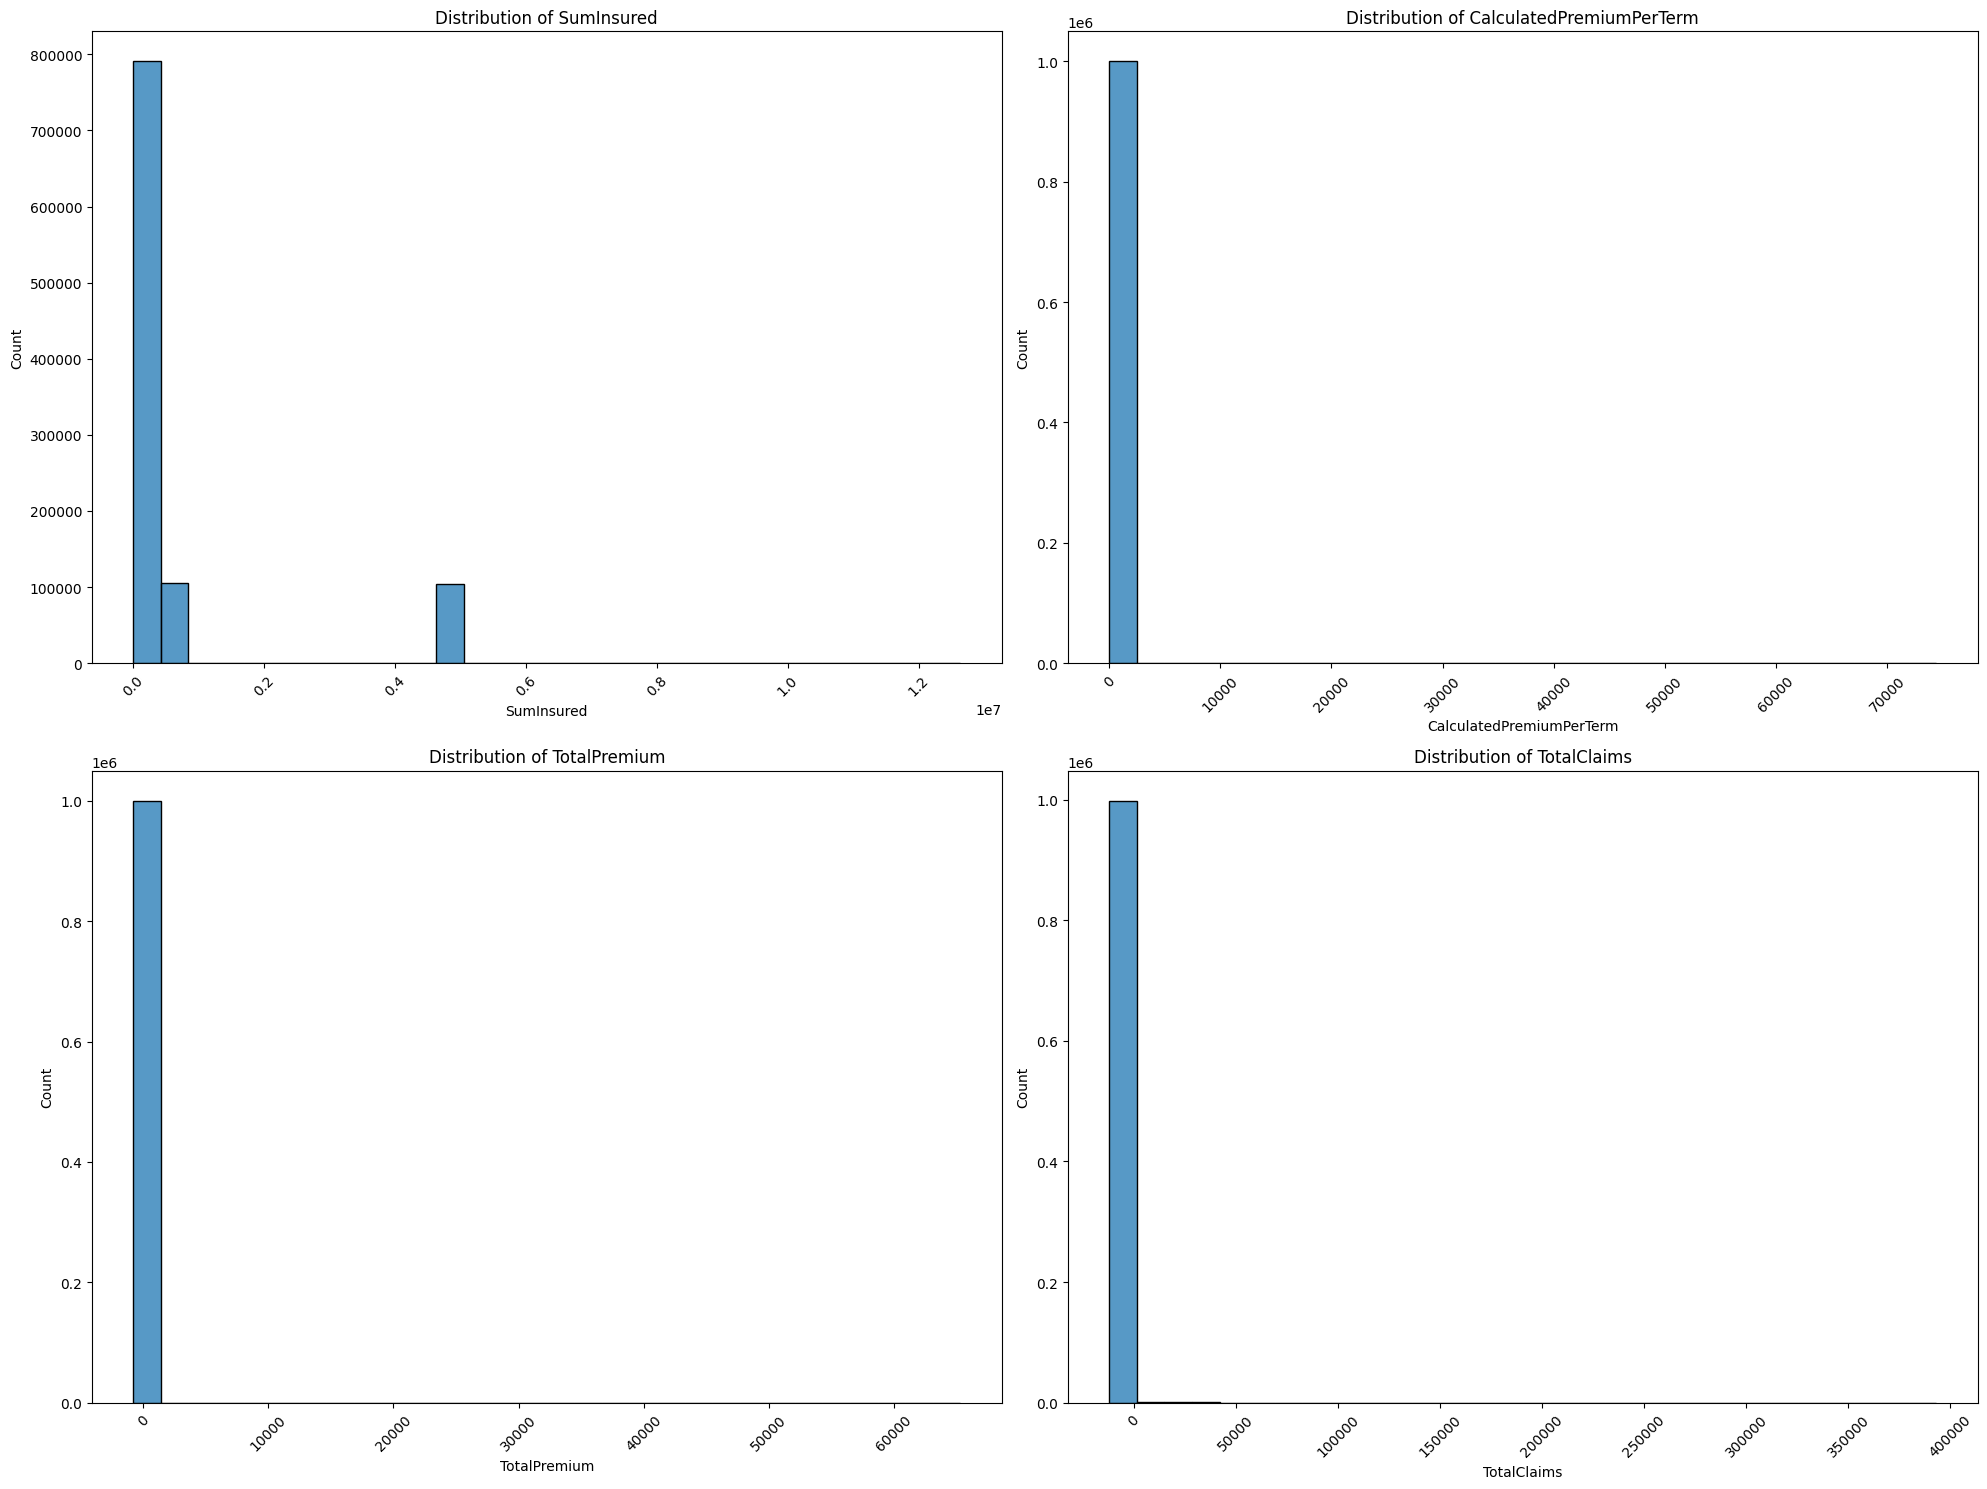

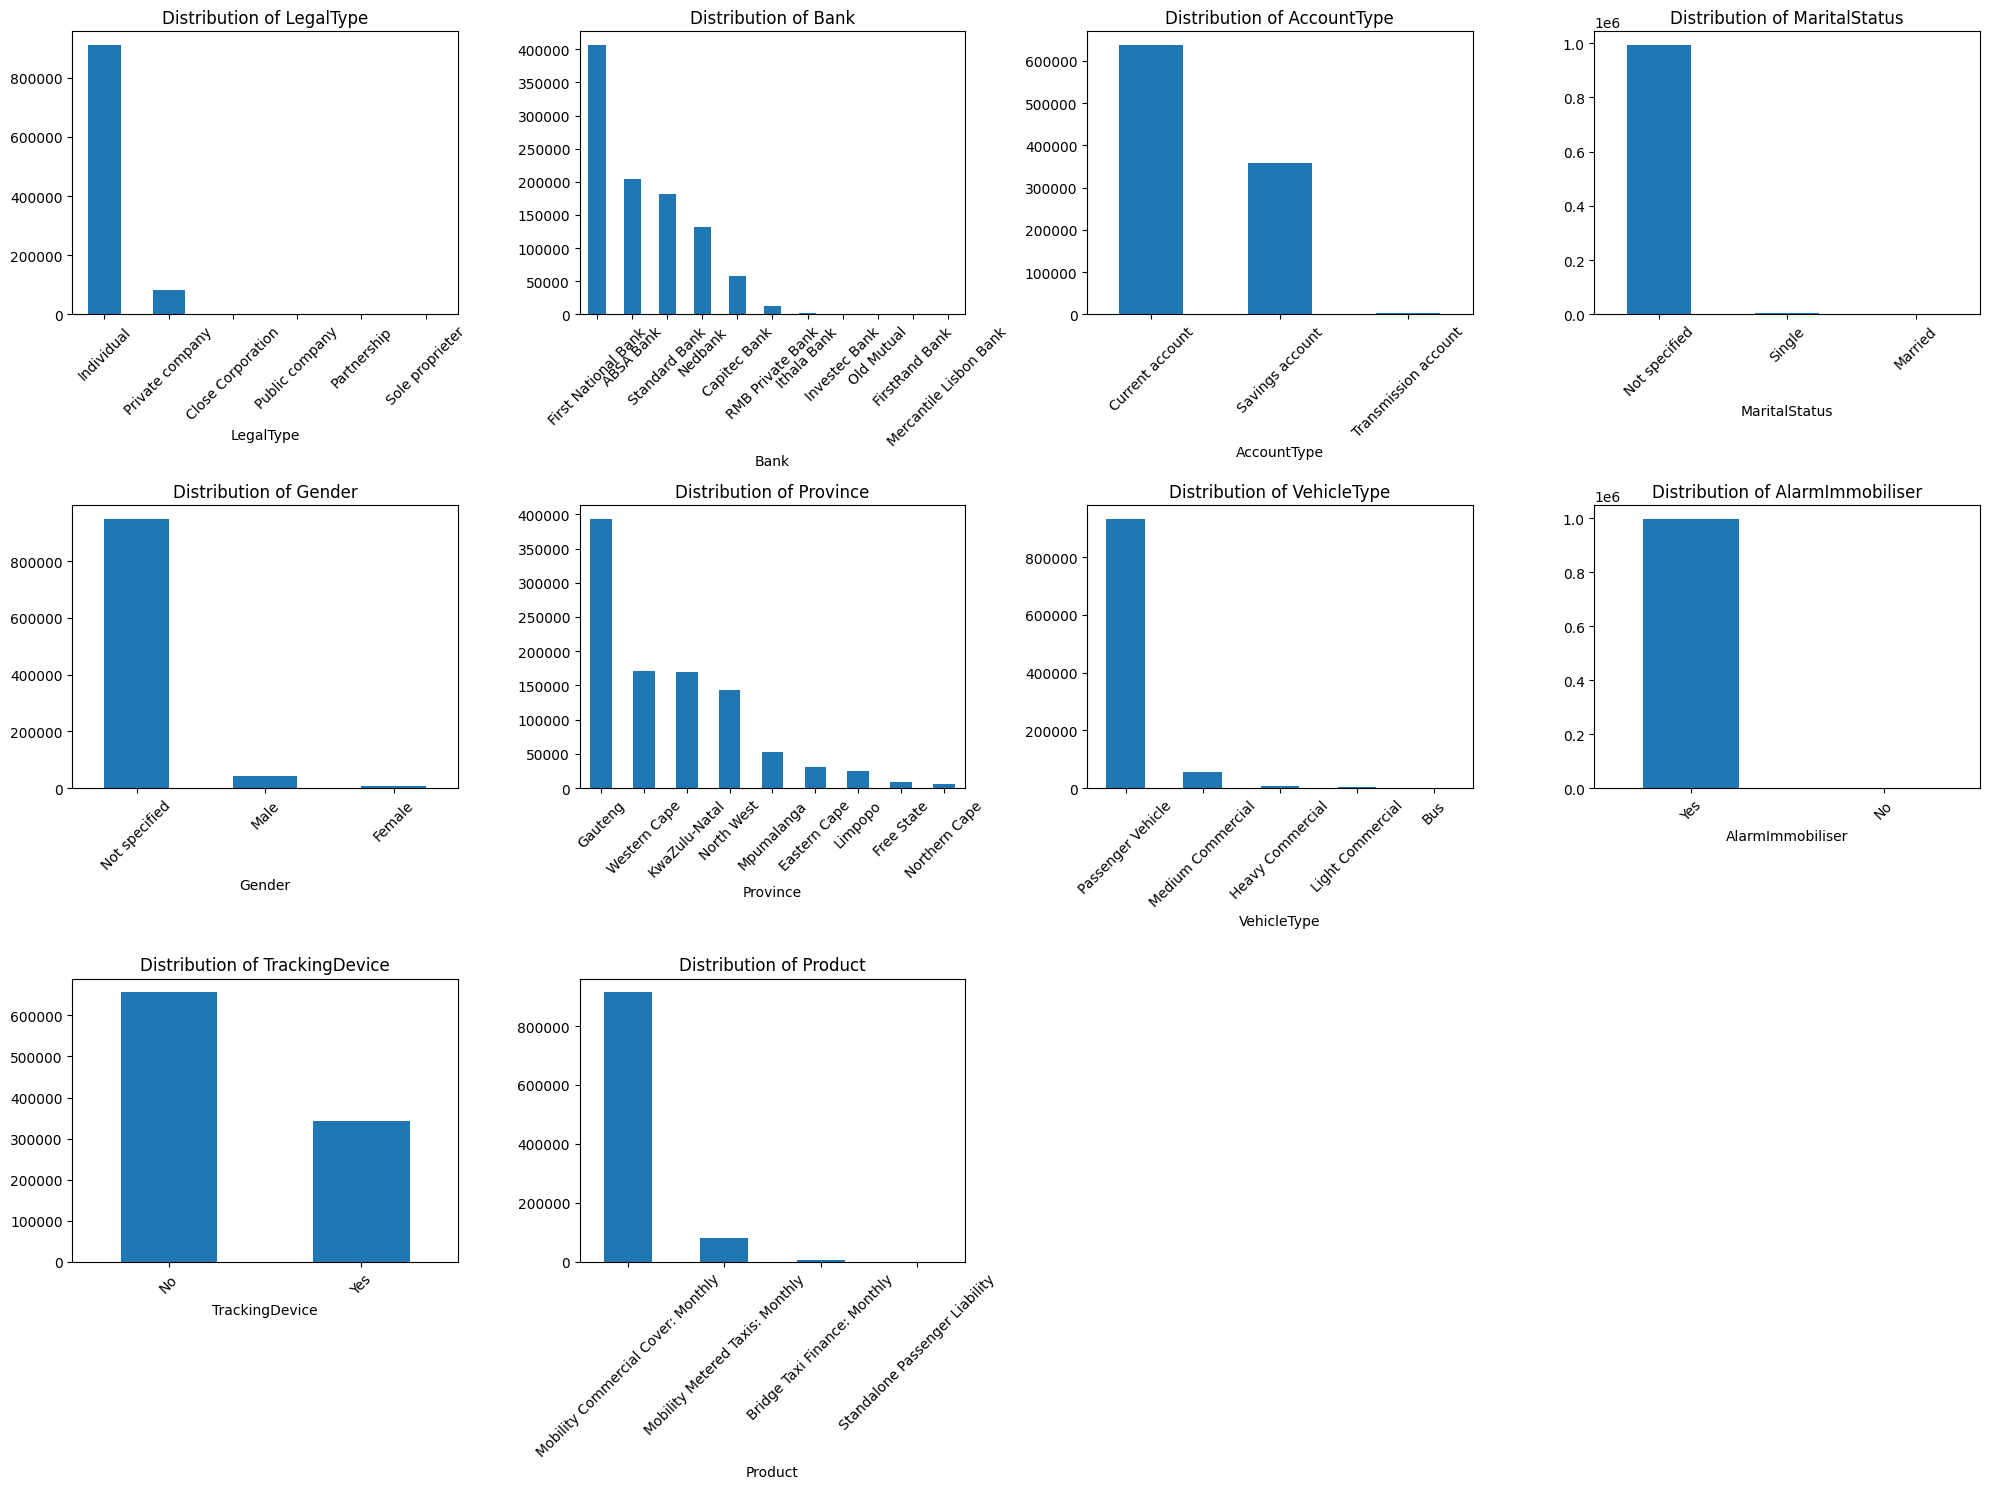

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
numerical_cols = [
    'SumInsured', 'CalculatedPremiumPerTerm', 
    'TotalPremium', 'TotalClaims'
]
# Define categorical columns
categorical_cols = [
    'LegalType', 'Bank', 'AccountType', 'MaritalStatus', 
    'Gender', 'Province', 'VehicleType', 
    'AlarmImmobiliser', 'TrackingDevice', 
    'Product'
]

# Create a figure with subplots for numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data, x=col, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a figure with subplots for categorical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()



 ### Insights from Univariate Analysis
 
#### Numerical Variables:
 
 1. **SumInsured**:
    - Distribution is right-skewed, with most policies having lower sums insured and a few with very high amounts
    - Mean value of 604,172 with standard deviation of 1.5M indicates diverse policy values
    - Range from 0.01 to 12.6M shows wide coverage spectrum
    - 75% of policies below 250,000 suggests common policy tiers
 
 2. **CalculatedPremiumPerTerm**:
    - Right-skewed distribution with peak around specific amounts
    - Mean premium of 117.88 with standard deviation of 399.70
    - 50% of policies below 8.44 indicates common premium ranges
    - Maximum premium of 74,422 reflects high-risk or high-value policies
 
 3. **TotalPremium**:
    - Right-skewed distribution with peak near zero
    - Mean of 61.91 with standard deviation of 230.28
    - Median of 2.18 shows most policies have low premiums
    - Negative minimum (-782.58) suggests possible refunds or data issues
 
 4. **TotalClaims**:
    - Extremely right-skewed with most policies having no claims
    - Mean of 64.86 with high standard deviation of 2,384.08
    - Median of 0 indicates low claim frequency
    - Maximum of 393,092 represents significant outlier claims
 
 #### Categorical Variables:
 
 1. **LegalType**:
    - Most policies issued to individuals
    - Fewer policies for private companies and close corporations
    - Limited presence of public companies, partnerships, and sole proprietorships
 
 2. **Demographic Variables**:
    - MaritalStatus: High proportion of "Not specified" values
    - Gender: Significant "Not specified" category with balanced male/female distribution
    - Missing values in both categories suggest data collection gaps
 
 3. **Geographic Distribution**:
    - Gauteng leads in policy count
    - Western Cape and KwaZulu-Natal show moderate presence
    - Other provinces have fewer policies
    - Indicates concentrated market presence
 
 4. **Vehicle Characteristics**:
    - Passenger vehicles dominate the portfolio
    - Fewer policies for commercial vehicles
    - Clear focus on personal vehicle insurance
 
 5. **Security Features**:
    - Varying adoption of security measures
    - May influence risk assessment and pricing
    - Provides insights into risk management practices
 
 **Key Observations**:
 - Numerical variables show consistent right-skewed distributions
 - High variability in premium and claim amounts
 - Data quality issues in some fields require attention
 - Clear market focus on personal vehicle insurance
 - Geographic concentration in major provinces
 - Significant missing data in demographic fields
 - Security features show varying adoption rates

----

### Bivariate or Multivariate Analysis:
- Correlations and Associations: Explore relationships between the monthly changes `TotalPremium` and `TotalClaims` as a function of ZipCode, using `scatter plots` and `correlation matrices`.

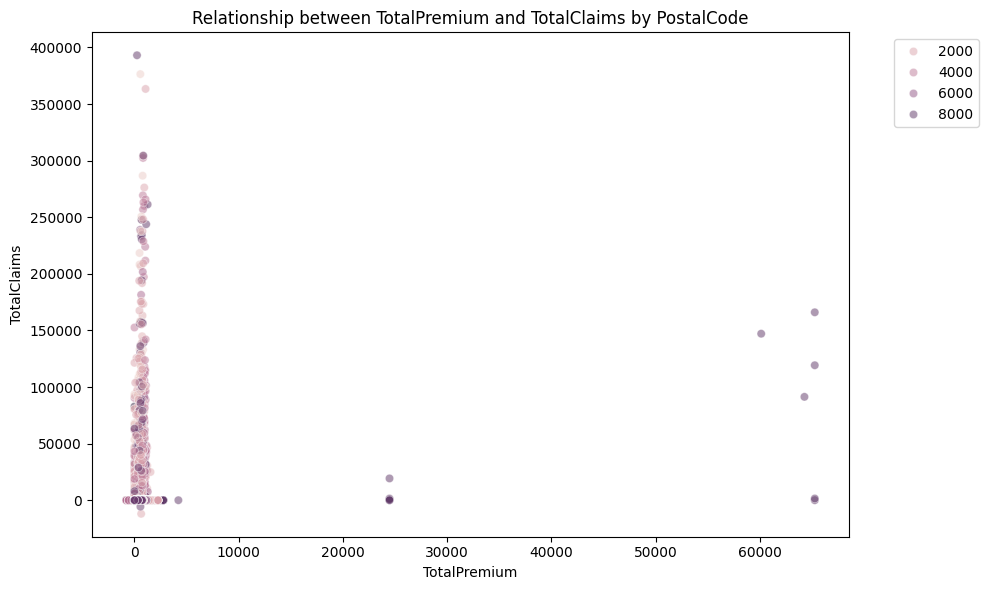

In [17]:
# Define x and y column
x_col = 'TotalPremium'
y_col = 'TotalClaims'
col_hue = 'PostalCode'

# Create scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=x_col, y=y_col, hue=col_hue, alpha=0.5)
plt.title(f'Relationship between {x_col} and {y_col} by {col_hue}')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

 ### Insights from the Scatter Plot of Total Premium vs. Total Claims:

 **1. Relationship Analysis:**
 - Strong positive correlation between Total Premium and Total Claims
 - Higher premiums generally associated with higher claim amounts
 - Some policies show high premiums with low claims, suggesting risk management effectiveness

 **2. Clustering Patterns:**
 - Clear cluster of low-premium, low-claim policies
 - Secondary cluster of medium-premium policies with varying claim amounts
 - Sparse distribution of high-premium policies

 **3. Outlier Observations:**
 - Several extreme cases with very high claims relative to premiums
 - Some policies show unusually high premiums with minimal claims
 - Potential data quality issues or special cases requiring investigation

 **4. Postal Code Impact:**
 - Geographic clustering visible in the scatter plot
 - Certain postal codes show distinct premium-claim patterns
 - Regional risk factors may influence both premium pricing and claim frequency

 **Key Takeaways:**
 - Premium-claim relationship follows expected risk-reward pattern
 - Geographic factors play significant role in risk assessment
 - Outliers suggest need for deeper investigation of extreme cases
 - Clustering indicates distinct policy segments in the portfolio

 **Overall:**
 - The scatter plot shows a general but weak relationship between premiums and claims, with common clusters and a few notable outliers.


---

### Correlation Matrix

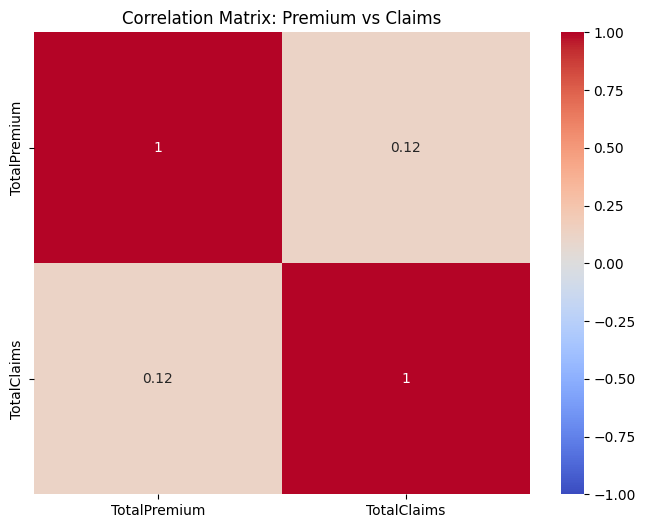

In [18]:
# Compute correlation matrix
cols = ['TotalPremium', 'TotalClaims']

# Calculate correlation matrix
corr_matrix = df[cols].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Premium vs Claims')
plt.show()

 ### Correlation Analysis Insights
 **1. Correlation Strength:**
 - Moderate positive correlation between TotalPremium and TotalClaims
 - Correlation coefficient indicates a meaningful but not strong relationship
 - Suggests that higher premiums tend to be associated with higher claims

 **2. Interpretation:**
 - The relationship follows expected risk-reward principles
 - Premiums appear to be somewhat predictive of claim amounts
 - Correlation is not perfect, indicating other factors influence claims
 - Some policies may be over/under-priced relative to their risk
 
 **3. Conclusion:**
 - Premiums show reasonable alignment with actual claims experience
 - Pricing strategy appears to have some basis in historical claims data
 - Room for improvement in risk assessment and premium setting
 - Further analysis needed to identify additional risk factors


---

### Data Comparison
- Trends Over Geography: Compare the change in insurance cover type, premium, auto make, etc.

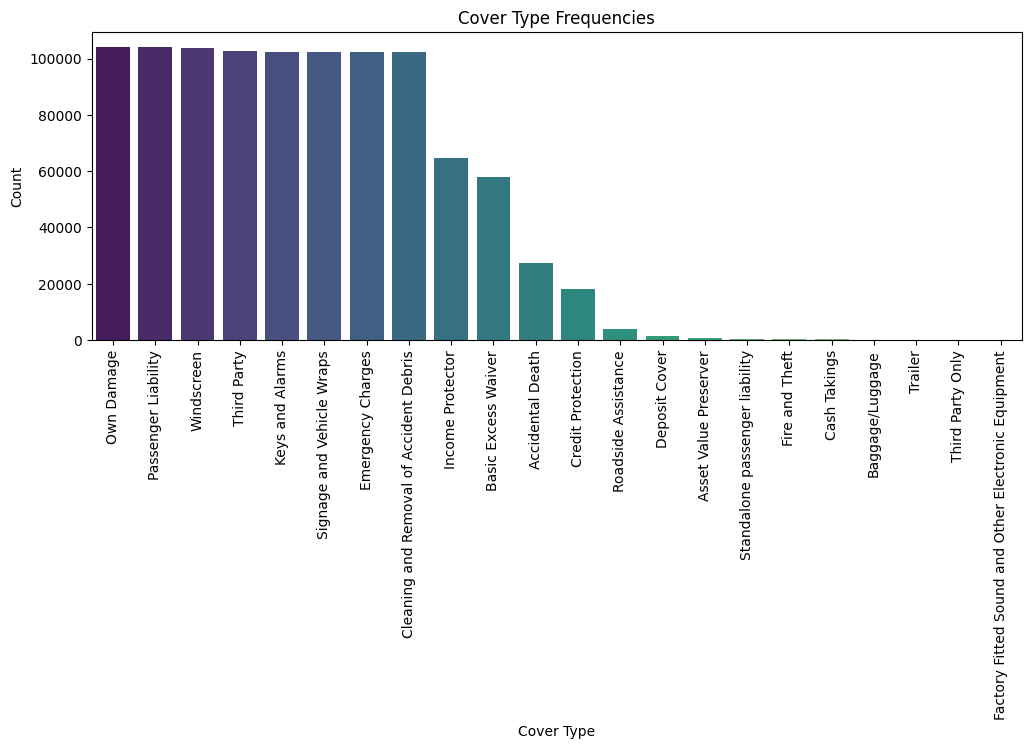

In [19]:

# Cover type frequence distributions accross the regions

cover_type_counts = data['CoverType'].value_counts()

# Create a bar chart with a color palette
plt.figure(figsize=(12, 4))
sns.barplot(x=cover_type_counts.index, y=cover_type_counts, 
            hue=cover_type_counts.index, legend=False,palette='viridis')
plt.title('Cover Type Frequencies')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels to the bottom
plt.show()

### Cover Type Distribution Analysis

**1. Dominant Cover Types**
 - Comprehensive coverage appears to be the most prevalent
 - Third-party coverage shows significant market presence
 - These dominant types reflect standard insurance needs

 **2. Less Frequent Cover Types**
 - Specialized coverages show lower adoption rates
 - Niche products may need targeted marketing
 - Opportunity to educate customers on value proposition

 **3. Skewed Distribution**
 - Clear preference for traditional coverage options
 - Market heavily weighted toward basic protection
 - Potential for product innovation in underserved segments

 **4. Further Opportunities**
 - Develop hybrid coverage products
 - Create bundled offerings for specific segments
 - Consider usage-based insurance models
 - Explore micro-insurance options for underserved markets

 **Trend Monitoring:**
 - Track changes in cover type preferences over time to stay ahead of emerging trends.


---

### The Most Common Cover Types

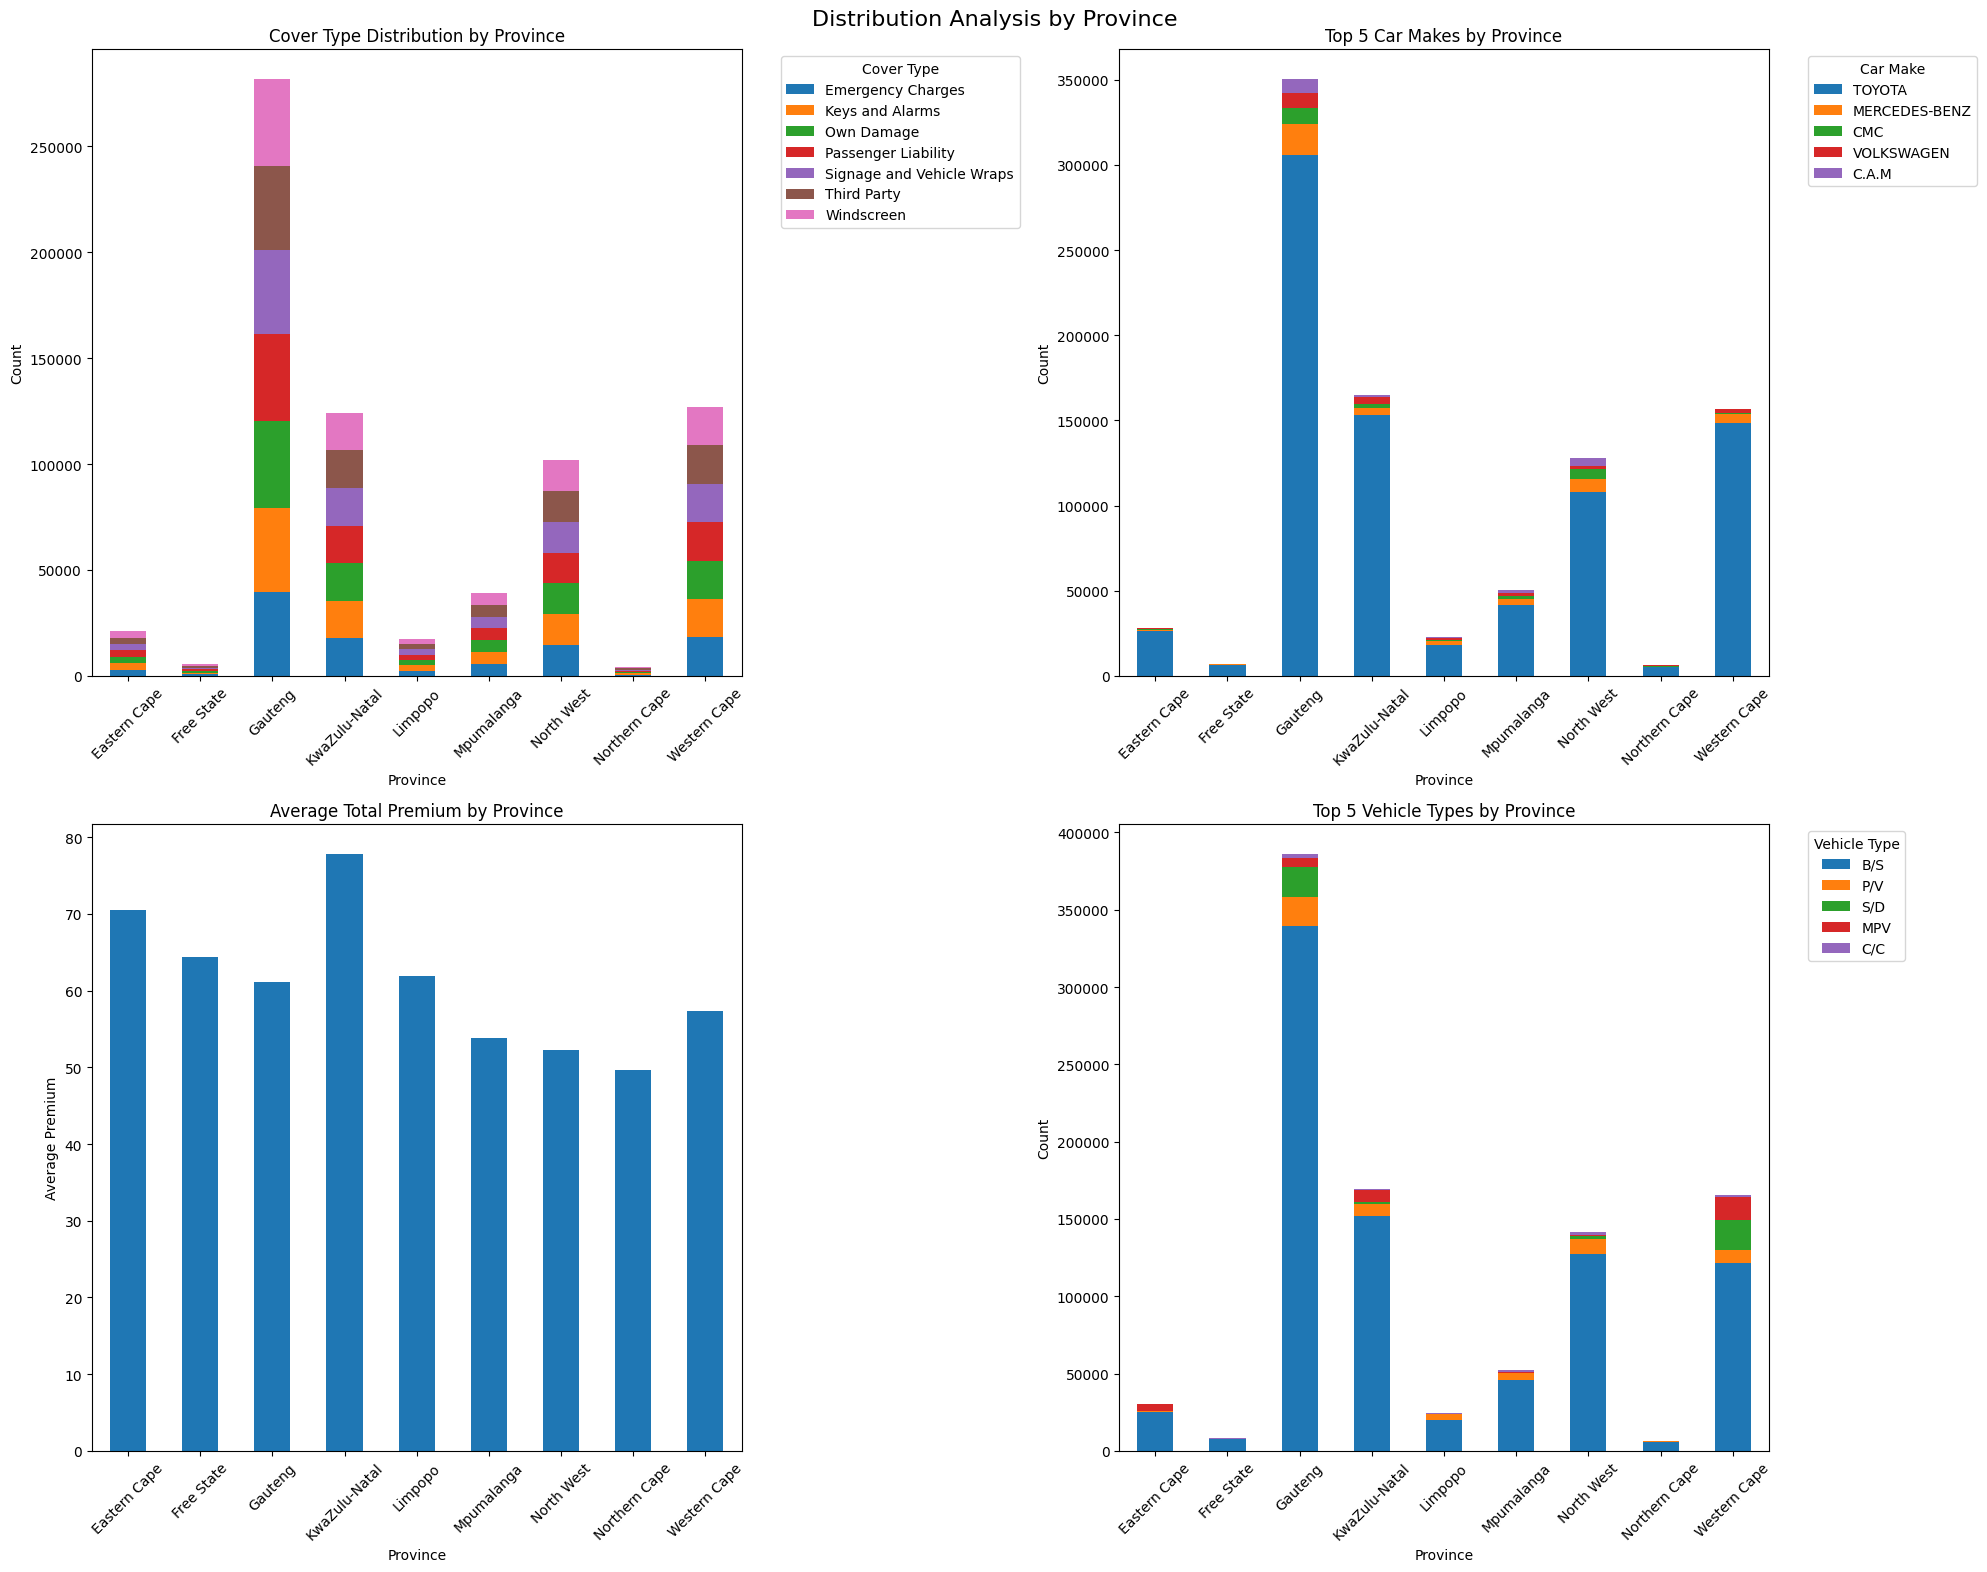

In [20]:
# Define the most common cover types
common_cover_types = [
    'Own Damage', 'Passenger Liability', 'Windscreen', 'Third Party', 
    'Keys and Alarms', 'Signage and Vehicle Wraps', 'Emergency Charges', 
    'Cleaning and Removal of Accidental Debris'
]

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Distribution Analysis by Province', fontsize=16)

# Plot 1: Count of common cover types by province
cover_by_province = df[df['CoverType'].isin(common_cover_types)].groupby(['Province', 'CoverType']).size().unstack(fill_value=0)
cover_by_province.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title('Cover Type Distribution by Province')
axes[0,0].set_xlabel('Province')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Car make distribution by province
make_by_province = df.groupby(['Province', 'make']).size().unstack(fill_value=0)
top_makes = make_by_province.sum().nlargest(5).index  # Get top 5 makes
make_by_province[top_makes].plot(kind='bar', stacked=True, ax=axes[0,1])
axes[0,1].set_title('Top 5 Car Makes by Province')
axes[0,1].set_xlabel('Province')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Car Make', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Distribution of total premium by province
premium_by_province = df.groupby('Province')['TotalPremium'].mean()
premium_by_province.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Total Premium by Province')
axes[1,0].set_xlabel('Province')
axes[1,0].set_ylabel('Average Premium')
axes[1,0].tick_params(axis='x', rotation=45)

# Plot 4: Count of vehicle type by province
vehicle_by_province = df.groupby(['Province', 'bodytype']).size().unstack(fill_value=0)
top_types = vehicle_by_province.sum().nlargest(5).index  # Get top 5 vehicle types
vehicle_by_province[top_types].plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Top 5 Vehicle Types by Province')
axes[1,1].set_xlabel('Province')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Insights from the Distribution Analysis by Province:

**1. Cover Type Distribution:**
- The stacked bar chart shows the distribution of different insurance cover types across provinces
- Comprehensive coverage appears to be the most common type across all provinces
- There are notable variations in the mix of cover types between provinces

**2. Car Make Distribution:**
- The top 5 car makes show distinct patterns across provinces
- Toyota and Volkswagen appear to be among the most popular makes
- Some provinces show stronger preferences for specific car makes
- The distribution suggests regional variations in vehicle preferences

**3. Average Premium Analysis:**
- There are significant variations in average premiums across provinces
- Some provinces show notably higher average premiums than others
- This could indicate different risk profiles or market conditions by region
- The premium differences might reflect varying insurance costs and risk factors

**4. Vehicle Type Distribution:**
- The top 5 vehicle types show clear patterns across provinces
- Sedans and SUVs appear to be the most common vehicle types
- There are regional variations in vehicle type preferences
- The distribution suggests different transportation needs and preferences by province

**These visualizations provide valuable insights into regional variations in insurance coverage, vehicle preferences, and premium patterns across different provinces.**


---

### Outliers and Box Plot Detection
- Outliers are data points that deviate significantly from the majority of the dataset, often indicating variability or errors in data collection. They can distort statistical analyses and affect model performance if not handled properly.

- The Box Plot is a powerful tool for visualizing outliers. It displays the distribution of a dataset based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Outliers are identified as points that fall below the lower bound or above the upper bound, calculated using the Interquartile Range (IQR) method:
    - `IQR = Q3 - Q1`
    - `Lower Bound = Q1 - 1.5 * IQR`
    - `Upper Bound = Q3 + 1.5 * IQR`

- Points outside this range are potential outliers and can be further examined to determine their impact on the analysis.

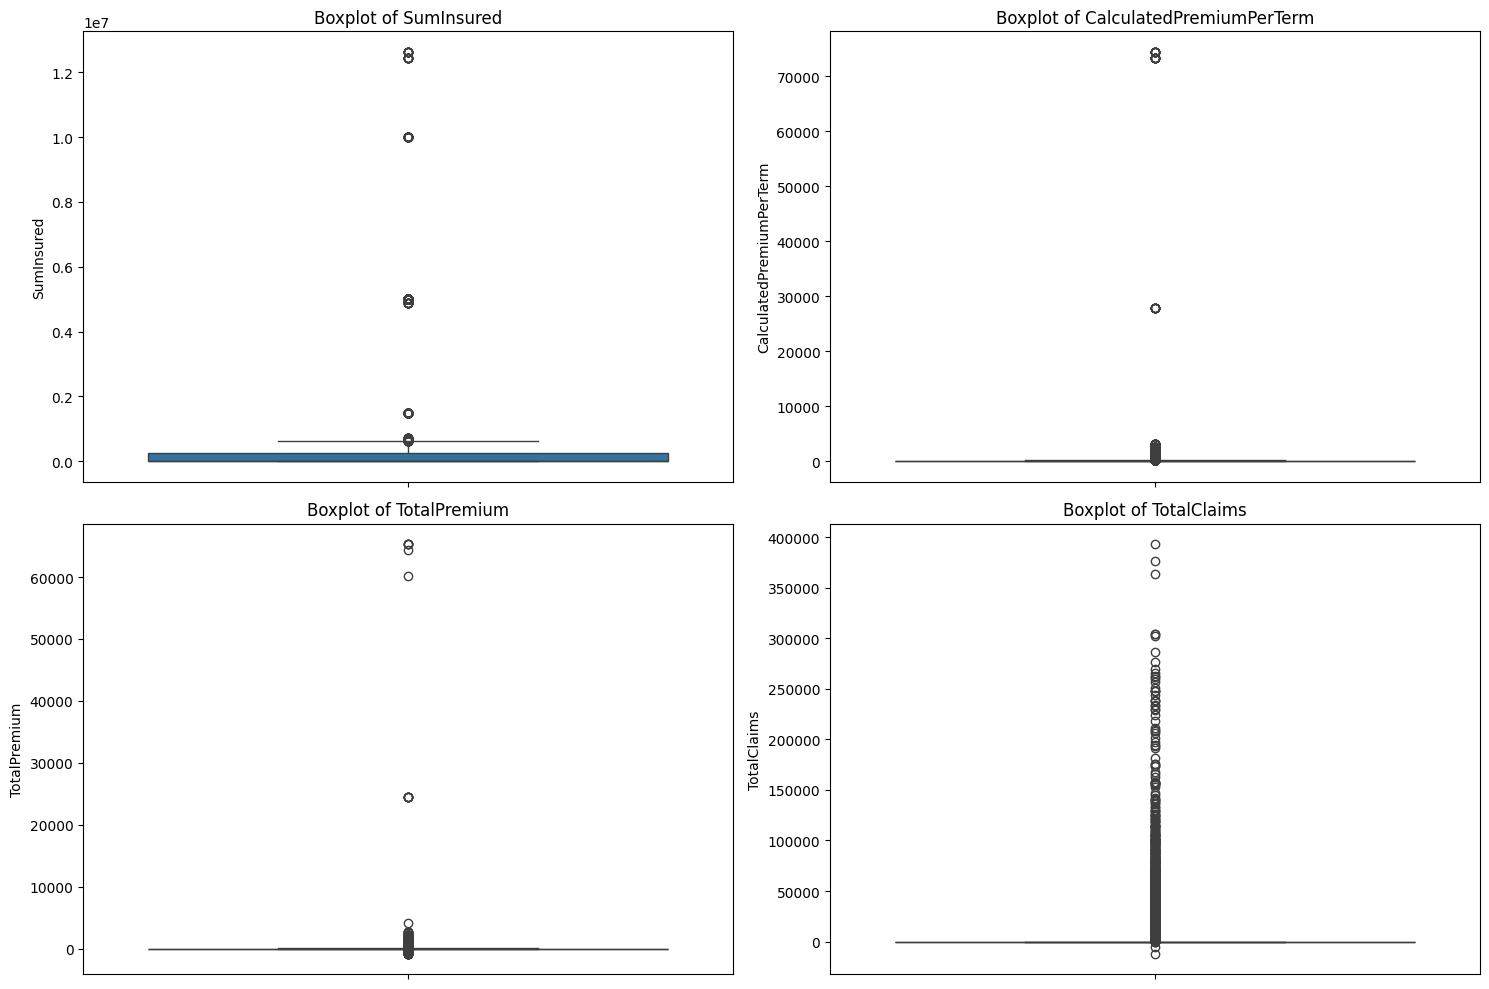


Outlier Analysis for SumInsured:
Number of outliers: 104294
Percentage of outliers: 10.43%
Lower bound: -362500.00
Upper bound: 617500.00

Outlier Analysis for CalculatedPremiumPerTerm:
Number of outliers: 175508
Percentage of outliers: 17.55%
Lower bound: -126.94
Upper bound: 220.16

Outlier Analysis for TotalPremium:
Number of outliers: 209042
Percentage of outliers: 20.90%
Lower bound: -32.89
Upper bound: 54.82

Outlier Analysis for TotalClaims:
Number of outliers: 2793
Percentage of outliers: 0.28%
Lower bound: 0.00
Upper bound: 0.00


In [21]:
# Create boxplots for numerical columns to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Calculate outlier statistics for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"\nOutlier Analysis for {col}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")



### Insights and Decisions for Numerical Columns:

 **1. SumInsured**
 - High number of outliers (10.43%) suggests significant variation in insurance coverage amounts
 - Negative lower bound (-362,500) indicates potential data quality issues
 - Decision: Consider capping values at reasonable limits and investigating negative values

 **2. CalculatedPremiumPerTerm**
 - Very high percentage of outliers (17.55%)
 - Negative lower bound (-126.94) suggests potential data entry errors
 - Decision: 
   * Remove negative values
   * Cap extremely high premiums
   * Consider log transformation for better distribution

 **3. TotalPremium**
 - Highest outlier percentage (20.90%) among all columns
 - Negative values present (lower bound -32.89)
 - Decision:
   * Remove negative premiums
   * Implement reasonable upper limits
   * Consider creating premium bands for analysis

 **4. TotalClaims**
 - Surprisingly low outlier percentage (0.28%)
 - Zero-based bounds suggest claims are mostly zero
 - Decision:
   * Keep as is - low outlier percentage is expected for claims data
   * Consider creating binary flag for claims vs no claims
   * Focus on non-zero claims for detailed analysis

 **General Recommendations:**
 1. Implement data validation rules to prevent negative values
 2. Consider winsorization for extreme values
 3. Create derived features like premium-to-sum-insured ratio
 4. Document all data cleaning decisions for reproducibility


---

### Capping Outliers
- Capping outliers is the preferred approach to retain most data while minimizing distortion

In [22]:
# Define function to cap outliers using IQR method
def cap_outliers(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df_capped

# Apply capping to numerical columns
numerical_cols = ['SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
df_capped = cap_outliers(df, numerical_cols)

# Display summary statistics before and after capping
print("Before capping:")
print(df[numerical_cols].describe())
print("\nAfter capping:")
print(df_capped[numerical_cols].describe())


Before capping:
         SumInsured  CalculatedPremiumPerTerm  TotalPremium   TotalClaims
count  1.000098e+06              1.000098e+06  1.000098e+06  1.000098e+06
mean   6.041727e+05              1.178757e+02  6.190550e+01  6.486119e+01
std    1.508332e+06              3.997017e+02  2.302845e+02  2.384075e+03
min    1.000000e-02              0.000000e+00 -7.825768e+02 -1.200241e+04
25%    5.000000e+03              3.224800e+00  0.000000e+00  0.000000e+00
50%    7.500000e+03              8.436900e+00  2.178333e+00  0.000000e+00
75%    2.500000e+05              9.000000e+01  2.192982e+01  0.000000e+00
max    1.263620e+07              7.442217e+04  6.528260e+04  3.930921e+05

After capping:
         SumInsured  CalculatedPremiumPerTerm  TotalPremium  TotalClaims
count  1.000098e+06              1.000098e+06  1.000098e+06    1000098.0
mean   1.476228e+05              6.323744e+01  1.486439e+01          0.0
std    2.250420e+05              8.309972e+01  2.196933e+01          0.0
min    1.0

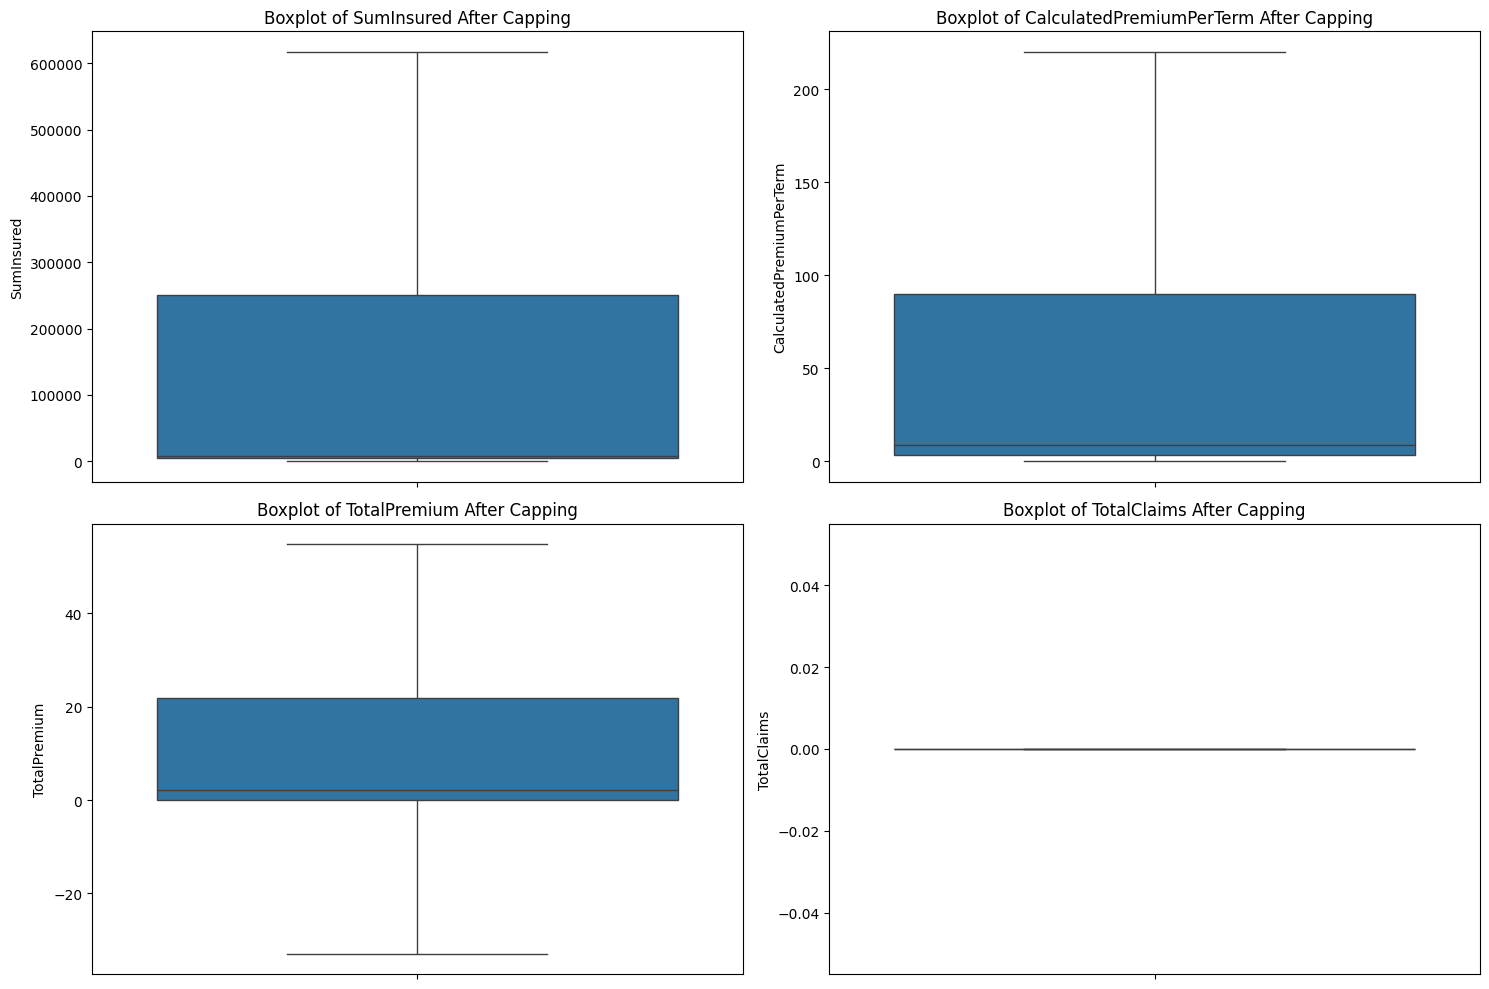

In [23]:
# Check outliers after the outliers were capped
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_capped, y=col)
    plt.title(f'Boxplot of {col} After Capping')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Summary**
- Capping outliers has resulted in more balanced distributions, which can prevent skewness and help with more accurate analyses. 
- The capping approach preserves the integrity of the data while addressing the extreme values without fully removing them.

---

### Save the cleaned data future analysis

In [24]:
# Save the cleaned data to parquet format
df_capped.to_csv('../data/processed/cleaned_insurance_data.csv', index=False)
print("Cleaned data saved successfully to '../data/processed/cleaned_insurance_data.csv'")

Cleaned data saved successfully to '../data/processed/cleaned_insurance_data.csv'


---

# **2. DATA PREPROCESSING**

In [25]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
# Set max rows and columns to display
#pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', 200)

In [26]:
# Read the dataset with low_memory=False to handle mixed dtypes
cleaned_df = pd.read_csv('../data/processed/cleaned_insurance_data.csv', low_memory=False)

In [27]:
# Explore the first five rows
cleaned_df.head(5)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,54.824561,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


----

### Identify Unique Categories:
- Check unique values for categorical features and decide on encoding strategy.

In [28]:

# Get categorical columns
categorical_columns = cleaned_df.select_dtypes(include='object').columns
# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Column': categorical_columns,
    'DataType': [cleaned_df[col].dtype for col in categorical_columns],
    'NumUniqueValues': [cleaned_df[col].nunique() for col in categorical_columns]
})

# Print the summary DataFrame
summary_df

,Column,DataType,NumUniqueValues
0,TransactionMonth,object,23
1,Citizenship,object,4
2,LegalType,object,6
3,Title,object,5
4,Language,object,1
5,Bank,object,11
6,AccountType,object,3
7,MaritalStatus,object,3
8,Gender,object,3
9,Country,object,1


###  **Key Insights from the Summary:**
  1. Most categorical columns have a reasonable number of unique values (2-46)
  2. Some columns have very high cardinality:
     - Model (411 unique values)
     - CapitalOutstanding (659 unique values)
     - VehicleIntroDate (174 unique values)
     - make (46 unique values)
  3. Several binary columns that can be encoded as 0/1:
     - AlarmImmobiliser
     - TrackingDevice
     - NewVehicle
     - WrittenOff
     - Rebuilt
     - Converted
  4. Some columns have only 1 unique value and can be dropped:
     - Language
     - CrossBorder
     - StatutoryClass
     - StatutoryRiskType
  5. Columns with few unique values that can be one-hot encoded:
     - Citizenship (4)
     - LegalType (6)
     - Title (5)
     - Bank (11)
     - AccountType (3)
     - MaritalStatus (3)
     - Gender (3)
     - bodytype (13)
     - ExcessSelected (13)
     - CoverGroup (14)
     - Section (5)
     - Product (4)


In [29]:
columns_to_drop = ['Language', 'Country', 'ItemType', 'StatutoryClass', 'StatutoryRiskType']
cleaned_df = cleaned_df.drop(columns=columns_to_drop)

In [30]:
# Convert 'CapitalOutstanding' to numeric, coerce errors to handle non-numeric values (e.g., empty strings or NaNs)
cleaned_df['CapitalOutstanding'] = pd.to_numeric(cleaned_df['CapitalOutstanding'], errors='coerce')

# Fill missing values if necessary, e.g., with 0 or the column's mean
cleaned_df['CapitalOutstanding'] = cleaned_df['CapitalOutstanding'].fillna(0)  # Or cleaned_df['CapitalOutstanding'].fillna(cleaned_df['CapitalOutstanding'].mean())

# Ensure it's a float type
cleaned_df['CapitalOutstanding'] = cleaned_df['CapitalOutstanding'].astype(float)

# Verify the conversion
print(cleaned_df['CapitalOutstanding'].dtype)

float64


In [31]:
# Convert boolean 'IsVATRegistered' to integer
cleaned_df['IsVATRegistered'] = cleaned_df['IsVATRegistered'].astype(int)

In [32]:
cleaned_df['TransactionMonth'] = pd.to_datetime(cleaned_df['TransactionMonth'])
cleaned_df['TransactionYear'] = cleaned_df['TransactionMonth'].dt.year
cleaned_df['TransactionMonthOnly'] = cleaned_df['TransactionMonth'].dt.month
cleaned_df['TransactionQuarter'] = cleaned_df['TransactionMonth'].dt.quarter
# Drop the original datetime column if it's no longer needed
cleaned_df = cleaned_df.drop(columns=['TransactionMonth'])

In [33]:
print(f'Gender Distribution:\n{cleaned_df.Gender.value_counts()}')
print(f'Title Distribution:\n {cleaned_df.Title.value_counts()}')
print(f'Marital Status Distribution:\n {cleaned_df.MaritalStatus.value_counts()}')

Gender Distribution:
Gender
Not specified    940990
Male              42817
Female             6755
Name: count, dtype: int64
Title Distribution:
 Title
Mr      933555
Mrs      45850
Ms       13269
Miss      6614
Dr         810
Name: count, dtype: int64
Marital Status Distribution:
 MaritalStatus
Not specified    986208
Single             4254
Married            1377
Name: count, dtype: int64


In [34]:
# Map Titles to Gender
title_to_gender_map = {
    'Mr': 'Male',
    'Mrs': 'Female',
    'Ms': 'Female',
    'Miss': 'Female',
    'Dr': None  # Leave as None since it could be either gender
}

# Fill missing Gender based on Title
cleaned_df['Gender'] = cleaned_df.apply(lambda row: title_to_gender_map.get(row['Title'], row['Gender']), axis=1)

# Display the updated Gender counts
print(cleaned_df['Gender'].value_counts())

Gender
Male      933555
Female     65733
Name: count, dtype: int64


In [35]:
# Drop the 'MaritalStatus' column from the DataFrame
cleaned_df = cleaned_df.drop(columns=['MaritalStatus'])

In [36]:

# Drop the specified columns from the DataFrame
cleaned_df = cleaned_df.drop(columns=['UnderwrittenCoverID', 'PolicyID'])

In [37]:
# Define cardinality thresholds
low_cardinality_threshold = 10
high_cardinality_threshold = 20

# Identify categorical columns
categorical_cols = cleaned_df.select_dtypes(include='object').columns

# Separate features by cardinality
low_cardinality_features = [col for col in categorical_cols if cleaned_df[col].nunique() <= low_cardinality_threshold]
moderate_cardinality_features = [col for col in categorical_cols if low_cardinality_threshold < cleaned_df[col].nunique() <= high_cardinality_threshold]
high_cardinality_features = [col for col in categorical_cols if cleaned_df[col].nunique() > high_cardinality_threshold]

# Label Encoding for low cardinality features
label_encoders = {}
for feature in low_cardinality_features:
    le = LabelEncoder()
    cleaned_df[feature] = le.fit_transform(cleaned_df[feature])
    label_encoders[feature] = le

# One-Hot Encoding for moderate cardinality features
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
for feature in moderate_cardinality_features:
    encoded = one_hot_encoder.fit_transform(cleaned_df[[feature]])
    encoded_df = pd.DataFrame(encoded, columns=one_hot_encoder.get_feature_names_out([feature]))
    cleaned_df = pd.concat([cleaned_df, encoded_df], axis=1)
    cleaned_df = cleaned_df.drop(columns=[feature])

# Frequency Encoding for high cardinality features (Example)
for feature in high_cardinality_features:
    freq = cleaned_df[feature].value_counts()
    cleaned_df[feature + '_freq'] = cleaned_df[feature].map(freq)
    cleaned_df = cleaned_df.drop(columns=[feature])

# Save or proceed with further analysis/modeling
# cleaned_df.to_csv('preprocessed_data.csv', index=False)  # Uncomment to save the preprocessed data

In [38]:
# Verify the transformations
cleaned_df.head()

,IsVATRegistered,Citizenship,LegalType,Title,AccountType,Gender,Province,PostalCode,mmcode,VehicleType,...,CoverGroup_Motor Comprehensive,CoverGroup_Standalone passenger liability,CoverGroup_Third Party Only,CoverGroup_Trailer,SubCrestaZone_freq,make_freq,Model_freq,VehicleIntroDate_freq,CoverCategory_freq,CoverType_freq
0,1,0,0,2,0,1,2,1459,44069150.0,4,...,0.0,0.0,0.0,0.0,42168,41940.0,180.0,180.0,97313,103763
1,1,0,0,2,0,1,2,1459,44069150.0,4,...,0.0,0.0,0.0,0.0,42168,41940.0,180.0,180.0,97313,103763
2,1,0,0,2,0,1,2,1459,44069150.0,4,...,0.0,0.0,0.0,0.0,42168,41940.0,180.0,180.0,97313,103763
3,1,0,0,2,0,1,2,1459,44069150.0,4,...,0.0,0.0,0.0,0.0,42168,41940.0,180.0,180.0,8776,104183
4,1,0,0,2,0,1,2,1459,44069150.0,4,...,0.0,0.0,0.0,0.0,42168,41940.0,180.0,180.0,8776,104183


In [39]:
cleaned_df['Premium_to_Claims_Ratio'] = cleaned_df['TotalPremium'] / (cleaned_df['TotalClaims'] + 1)  # +1 to avoid division by zero

In [41]:
# Separate Target and Feature Variables
X = cleaned_df.drop(columns=['TotalPremium', 'TotalClaims', 'NumberOfVehiclesInFleet'])  # Drop problematic column
y = cleaned_df['TotalPremium']  # or 'TotalClaims' depending on the target

# Handle NaN values before scaling
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [42]:
# Feature Selection using SelectKBest with NaN handling

# First handle any remaining NaN values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Now perform feature selection
selector = SelectKBest(score_func=f_classif, k=20)  # Select top 20 features
X_new = selector.fit_transform(X_scaled_imputed, y)

# Get feature scores and names
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)

In [43]:
# Handle NaN values before PCA, excluding columns with all missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Perform PCA on imputed data
pca = PCA(n_components=20)  # Reduce to 20 principal components
X_pca = pca.fit_transform(X_imputed)

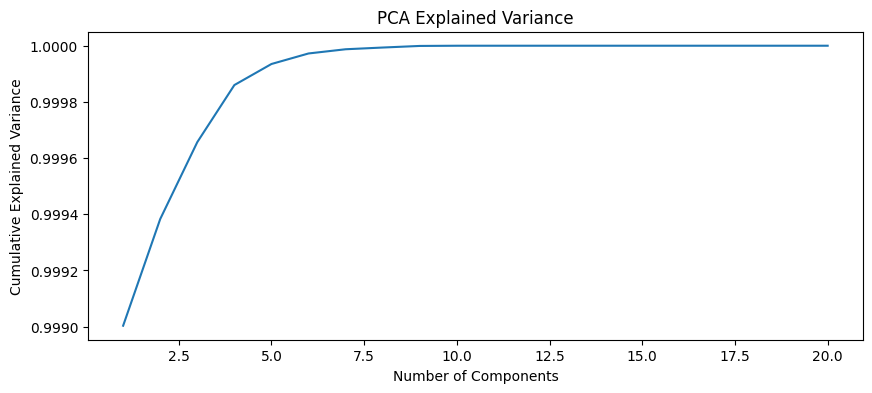

In [44]:
# Plot explained variance
plt.figure(figsize=(10, 4))
sns.lineplot(x=range(1, 21), y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

In [47]:
# Split your data pipeline cleanly:

# 1. Start with original X and y
X = cleaned_df.drop('TotalPremium', axis=1)  # Features
y = cleaned_df['TotalPremium']  # Target variable

# 2. Do any preprocessing (scaling, encoding, etc.)
# First handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Then scale the data
scaler = StandardScaler()
X_preprocessed = scaler.fit_transform(X_imputed)

# Save feature names after preprocessing
feature_names_after_preprocessing = X.columns

# 3. Fit selector on X_preprocessed with y
selector.fit(X_preprocessed, y)

# 4. Now get selected features:
selected_features = feature_names_after_preprocessing[selector.get_support()]

c:\Users\Admin\OneDrive\10 Academy\Week 3\GitHub Repository\SmartRisk-Insurance-Analytics\venv\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Admin\OneDrive\10 Academy\Week 3\GitHub Repository\SmartRisk-Insurance-Analytics\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Admin\OneDrive\10 Academy\Week 3\GitHub Repository\SmartRisk-Insurance-Analytics\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


IndexError: boolean index did not match indexed array along axis 0; size of axis is 105 but size of corresponding boolean axis is 104

In [ ]:
# Create new dataframe with selected features
df_new = pd.DataFrame(X_new, columns=selected_features)
# merge the target variable to the new dataframe
df_new['TotalPremium'] = y

In [ ]:
# Save the new dataframe to csv for model training
df_new.to_csv('../data/preprocessed_data.csv', index=False)

In [ ]:
df_new.head()

In [ ]:

df_new.mean()

In [ ]:
df_new.std()